In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data1 = pd.read_csv('./Unemployment/Unemployment-in-India.csv')
data1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [3]:
data2 = pd.read_csv('./Unemployment/Unemployment_Rate_upto_11_2020.csv')
data2.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [5]:
# Data1 and Data2 info

print(f'Data1 Info : {data1.info()}\n')
print(f'Data2 Info : {data2.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 41.4+ KB
Data1 Info : None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  -----

##### Formatting the Data1 file

In [6]:
# As we can see Date is currently an object and is not in DateTime format

data1[' Date'] = pd.to_datetime(data1[' Date'])
data1['Day'] = data1[' Date'].dt.day
data1['Month'] = data1[' Date'].dt.month_name()
data1['Year'] = data1[' Date'].dt.year
data1.columns = data1.columns.str.strip()

C:\Users\Arnav\AppData\Local\Temp\ipykernel_12512\1164924430.py:3: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data1[' Date'] = pd.to_datetime(data1[' Date'])


In [7]:
# checking for null values

data1.isnull().sum()

Region                                     14
Date                                       14
Frequency                                  14
Estimated Unemployment Rate (%)            14
Estimated Employed                         14
Estimated Labour Participation Rate (%)    14
Area                                       14
Day                                        14
Month                                      14
Year                                       14
dtype: int64

In [8]:
data1 = data1.dropna()
data1.isnull().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
Day                                        0
Month                                      0
Year                                       0
dtype: int64

##### Formatting the Data2 File

In [9]:
data2.columns = data2.columns.str.strip()
data2['Date'] = pd.to_datetime(data2['Date'])
data2['Year'] = data2['Date'].dt.year
data2['Month'] = data2['Date'].dt.month_name()
data2.dropna(axis=0)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   267 non-null    object        
 1   Date                                     267 non-null    datetime64[ns]
 2   Frequency                                267 non-null    object        
 3   Estimated Unemployment Rate (%)          267 non-null    float64       
 4   Estimated Employed                       267 non-null    int64         
 5   Estimated Labour Participation Rate (%)  267 non-null    float64       
 6   Region.1                                 267 non-null    object        
 7   longitude                                267 non-null    float64       
 8   latitude                                 267 non-null    float64       
 9   Year                                     26

C:\Users\Arnav\AppData\Local\Temp\ipykernel_12512\1940164082.py:2: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data2['Date'] = pd.to_datetime(data2['Date'])


### EDA

##### Data1

In [10]:
# Describing the data

data1.describe(include='all')

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Day,Month,Year
count,740,740,740,740.000000,7.400000e+02,740.000000,740,740.000000,740,740.000000
unique,28,NaN,2,NaN,NaN,NaN,2,NaN,12,NaN
top,Andhra Pradesh,NaN,Monthly,NaN,NaN,NaN,Urban,NaN,May,NaN
freq,28,NaN,381,NaN,NaN,NaN,381,NaN,105,NaN
mean,NaN,2019-12-12 18:36:58.378378496,NaN,11.787946,7.204460e+06,42.630122,NaN,30.502703,NaN,2019.418919
min,NaN,2019-05-31 00:00:00,NaN,0.000000,4.942000e+04,13.330000,NaN,29.000000,NaN,2019.000000
25%,NaN,2019-08-31 00:00:00,NaN,4.657500,1.190404e+06,38.062500,NaN,30.000000,NaN,2019.000000
50%,NaN,2019-11-30 00:00:00,NaN,8.350000,4.744178e+06,41.160000,NaN,31.000000,NaN,2019.000000
75%,NaN,2020-03-31 00:00:00,NaN,15.887500,1.127549e+07,45.505000,NaN,31.000000,NaN,2020.000000
max,NaN,2020-06-30 00:00:00,NaN,76.740000,4.577751e+07,72.570000,NaN,31.000000,NaN,2020.000000


In [11]:
# Descriptive Stats for Data1

state = data1.groupby(['Region'])[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']].mean()
state = pd.DataFrame(state).reset_index()
state

,Region,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
0,Andhra Pradesh,7.477143,8.154093e+06,39.375714
1,Assam,6.428077,5.354772e+06,44.868462
2,Bihar,18.918214,1.236619e+07,38.153929
3,Chandigarh,15.991667,3.168312e+05,39.336667
4,Chhattisgarh,9.240357,4.303499e+06,42.810714
5,Delhi,16.495357,2.627513e+06,38.929643
6,Goa,9.274167,2.263083e+05,39.249583
7,Gujarat,6.663929,1.140201e+07,46.101071
8,Haryana,26.283214,3.557072e+06,42.737143
9,Himachal Pradesh,18.540357,1.059824e+06,44.222143


##### Data2

In [12]:
# Describing Data2

data2.describe(include='all')

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude,Year,Month
count,267,267,267,267.000000,2.670000e+02,267.000000,267,267.000000,267.000000,267.0,267
unique,27,NaN,1,NaN,NaN,NaN,5,NaN,NaN,NaN,10
top,Andhra Pradesh,NaN,M,NaN,NaN,NaN,North,NaN,NaN,NaN,March
freq,10,NaN,267,NaN,NaN,NaN,79,NaN,NaN,NaN,27
mean,NaN,2020-06-16 09:15:30.337078528,NaN,12.236929,1.396211e+07,41.681573,NaN,22.826048,80.532425,2020.0,NaN
min,NaN,2020-01-31 00:00:00,NaN,0.500000,1.175420e+05,16.770000,NaN,10.850500,71.192400,2020.0,NaN
25%,NaN,2020-03-31 00:00:00,NaN,4.845000,2.838930e+06,37.265000,NaN,18.112400,76.085600,2020.0,NaN
50%,NaN,2020-06-30 00:00:00,NaN,9.650000,9.732417e+06,40.390000,NaN,23.610200,79.019300,2020.0,NaN
75%,NaN,2020-08-31 00:00:00,NaN,16.755000,2.187869e+07,44.055000,NaN,27.278400,85.279900,2020.0,NaN
max,NaN,2020-10-31 00:00:00,NaN,75.850000,5.943376e+07,69.690000,NaN,33.778200,92.937600,2020.0,NaN


In [13]:
# Descriptive Stats for Data2

State=data2.groupby(['Region'])[['Estimated Unemployment Rate (%)','Estimated Employed','Estimated Labour Participation Rate (%)']].mean()
State=pd.DataFrame(State).reset_index()
State

,Region,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
0,Andhra Pradesh,8.664000,1.542548e+07,38.962000
1,Assam,4.856000,1.081028e+07,43.498000
2,Bihar,19.471000,2.360683e+07,37.173000
3,Chhattisgarh,7.819000,8.421349e+06,41.161000
4,Delhi,18.414000,4.632822e+06,35.857000
5,Goa,12.167000,4.423748e+05,39.242000
6,Gujarat,6.376000,2.273075e+07,45.490000
7,Haryana,27.477000,6.844059e+06,42.100000
8,Himachal Pradesh,16.065000,2.033885e+06,40.252000
9,Jammu & Kashmir,16.477778,3.310032e+06,37.894444


### Statistical EDA

In [14]:
# Unemployment Rate over-time

plt.figure(figsize=(14,7))
fig = px.bar(data1, x='Region', y='Estimated Unemployment Rate (%)', color='Region', title="Estimated Unemployment Rate vs Region")
fig.update_layout(xaxis = {'categoryorder':'total descending'})
fig.show()

<Figure size 1400x700 with 0 Axes>

Therefore, Tripura has the highest Unemployment Rate
<br> while, Sikkim has the lowest Unemployment Rate

In [15]:
# Estimated Employed over Month from Data1

plt.figure(figsize=(14,7))
fig = px.bar(data1, x='Region', y='Estimated Employed', color='Region', animation_frame="Month", title="Estimated Employed over Months")
fig.update_layout(xaxis = {'categoryorder':'total ascending'})
fig.show()

<Figure size 1400x700 with 0 Axes>

It can easily be noted that U.P has the highest Employment,
<br> whereas, Sikkim has the lowest Employment rate

In [23]:
# Unemployment Distribution by Location

fig = px.box(data_frame = data1, x = 'Region', y = 'Estimated Unemployment Rate (%)', title = 'Unemployment Distribution by Location', color = 'Region')
fig.update_traces(quartilemethod="exclusive")
fig.show()

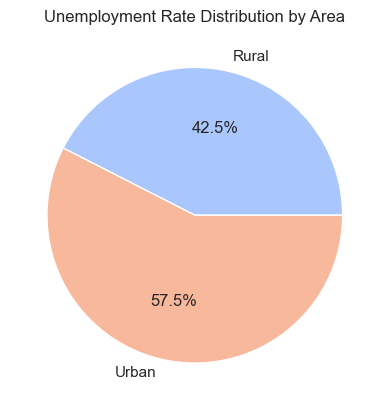

In [17]:
# Unemployment based on Area

area_unemployed = data1.groupby("Area")["Estimated Unemployment Rate (%)"].sum()
plt.pie(area_unemployed, labels=area_unemployed.index, colors=sns.color_palette("coolwarm", len(area_unemployed)), autopct='%1.1f%%')
plt.title('Unemployment Rate Distribution by Area')
plt.show()

In [18]:
# Modfying state data as the lockdown was imposed around March

data_filter = data1[(data1['Date'] >= "2019-05-01") & (data1['Date'] < "2020-03-01")]
state = data_filter.groupby(['Region'])[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']].mean()
state=pd.DataFrame(state).reset_index()

# Plotting the graph
plt.figure(figsize=(24,8))
fig = px.scatter_matrix(state, template='plotly',
                        dimensions=['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)'],
                        color='Region', title="Scenario till Feb 2020")
fig.show()

<Figure size 2400x800 with 0 Axes>

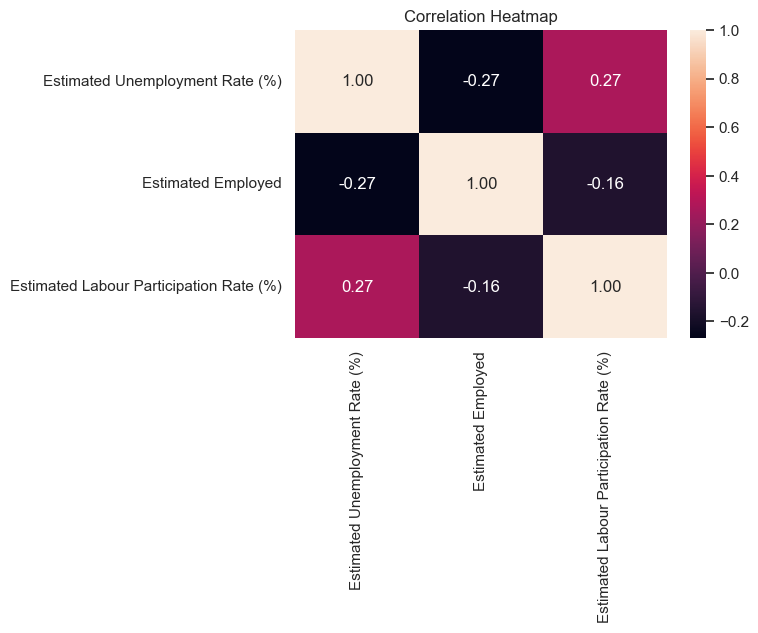

In [21]:
# Correlation Heatmap before Impact

data_hm = state[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(data_hm, annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [19]:
# Scatter matrix cosidering the employed and unemployed rates

plt.figure(figsize=(24,8))
fig = px.scatter_matrix(State, template='plotly',
                        dimensions=['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)'],
                        color='Region', title="Scenario in 2020")
fig.show()

<Figure size 2400x800 with 0 Axes>

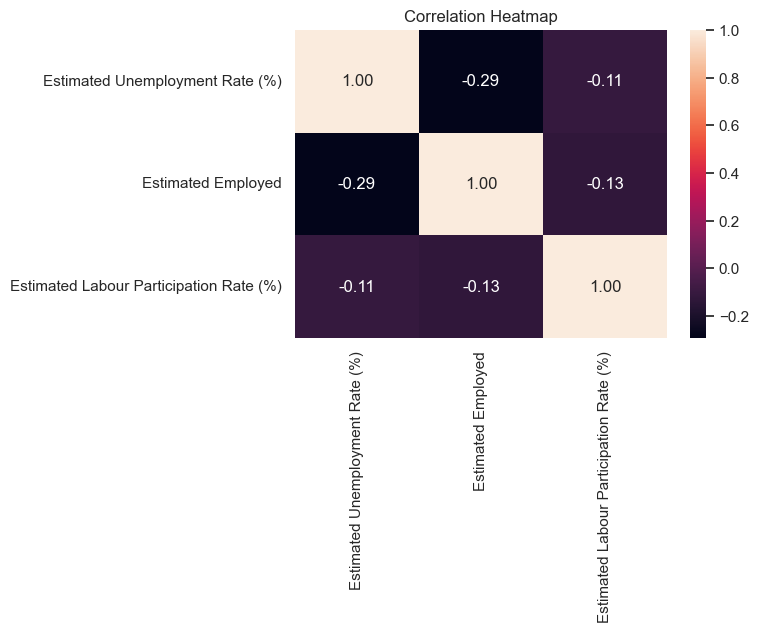

In [20]:
# Correlation Heatmap of Scenario 2020

data2_hm = State[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(data2_hm, annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [25]:
# Variation in Unemployment Rate

fig = go.Figure()
fig.add_trace(go.Scatter(x = state['Region'],y = state['Estimated Unemployment Rate (%)'], mode = 'lines+markers', name = '2019-2020'))
fig.add_trace(go.Scatter(x = State['Region'],y = State['Estimated Unemployment Rate (%)'], mode = 'lines+markers', name = '2020'))
fig.update_layout(title = 'Difference b/w the Unemployment Rate')
fig.show()

In [28]:
# Variation in Employed

fig = go.Figure()
fig.add_trace(go.Scatter(x = state['Region'],y = state['Estimated Employed'], mode = 'lines+markers', name = '2019-2020'))
fig.add_trace(go.Scatter(x = State['Region'],y = State['Estimated Employed'], mode = 'lines+markers', name = '2020'))
fig.update_layout(title = 'Difference b/w Estimated Employed')
fig.show()

In [29]:
# Variation in Labour Participation Rate

fig = go.Figure()
fig.add_trace(go.Scatter(x = state['Region'],y = state['Estimated Labour Participation Rate (%)'], mode = 'lines+markers', name = '2019-2020'))
fig.add_trace(go.Scatter(x = State['Region'],y = State['Estimated Labour Participation Rate (%)'], mode = 'lines+markers', name = '2020'))
fig.update_layout(title = 'Difference b/w the Labour Participation Rate')
fig.show()

In [30]:
# Distributing the data among Before Lockdown and After Lockdown from bothe the files

before_lockdown = data1[(data1['Date'] >= '2019-01-01') & (data1['Date'] < '2020-03-01')]
after_lockdown = data1[(data1['Date'] >= '2020-03-01')]

In [31]:
# Calculating the Mean Unemployment Rate Before Lockdown according to Staes

bf_lkd= before_lockdown.groupby('Region')['Estimated Unemployment Rate (%)'].mean().reset_index()

# Calculating the Mean Unemployment Rate After Lockdown according to States

af_lkd = after_lockdown.groupby('Region')['Estimated Unemployment Rate (%)'].mean().reset_index()

# Combining the Mean Unemployment Rates Before and After Lockdown by States

df = pd.merge(bf_lkd, af_lkd, on='Region')
df.columns=['States','Unemployment Rate Before Lockdown','Unemployment Rate After Lockdown']
df.head()

,States,Unemployment Rate Before Lockdown,Unemployment Rate After Lockdown
0,Andhra Pradesh,5.037500,13.576250
1,Assam,6.372632,6.578571
2,Bihar,13.833000,31.631250
3,Chandigarh,16.325000,14.325000
4,Chhattisgarh,7.706500,13.075000


In [39]:
#  Rate of change of UnEmployment

df['Rate of Change of UnEmployment'] = round(((df['Unemployment Rate After Lockdown'] - df['Unemployment Rate Before Lockdown'])/df['Unemployment Rate Before Lockdown'])*100, 2)
fig = go.Figure()
fig.add_trace(go.Scatter(x = df['States'], y = df['Rate of Change of UnEmployment'], mode = 'lines+markers', fill = 'tonextx'))
fig.update_layout(title = '% Rate of change in Unemployment')
fig.show()